# $D_{s0}^{*}(2317)^+\to D_s^+\pi^0$ production study
## Selection efficiencies
### $D_s^+ \to K^+ K^- \pi^+ \pi^0$ decay
#### Calculation for each nVeloTrack bin with binomial approach

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [3]:
import ROOT
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import sys 
import uncertainties as un
import pandas as pd
import mplhep
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())


plt.style.use(mplhep.style.LHCb2)

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

2023-10-21 16:35:01.948111
-------------------------
Set LHCb Style - May 2021
-------------------------


## RDataFrame definition

In [4]:
MC_path = '/RXcHadronic_2/antonio.romero/DsSpectroscopy/MC/D2KKpipi0/'
MC_files = 'Ds2KKpipi0_2016_Up.root'
dtt = "D2KKPiTuple"

tdf_raw = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+MC_files)
tdf = tdf_raw.Define("DplM", "Dpl_M-piz_M+135")
tdf = tdf.Define("KK_M", "sqrt((Kpl_PE+Kmi_PE)*(Kpl_PE+Kmi_PE)-(Kpl_PX+Kmi_PX)*(Kpl_PX+Kmi_PX)-(Kpl_PY+Kmi_PY)*(Kpl_PY+Kmi_PY)-(Kpl_PZ+Kmi_PZ)*(Kpl_PZ+Kmi_PZ))")

## MCmatching and selection RDF

In [7]:
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID["D2KKPiPi0RTuple"]
TRUEID_Ds = TRUEID_dtt["Ds2KKPiPi0"]

phi_cut = "KK_M > 1014.461 && KK_M < 1024.461"
neu_cut = "g1_CL > 0.6 && g2_CL > 0.6 && g1_PT > 400 && g2_PT > 400"
ch_cut = "Kpl_ProbNNk > 0.4 && Kmi_ProbNNk > 0.4 && pi_ProbNNpi > 0.2 && Dpl_ENDVERTEX_CHI2 < 18 && Kpl_MINIPCHI2 > 15 && Kmi_MINIPCHI2 > 15 && pi_MINIPCHI2 > 15"

neu_ch_cut = neu_cut+"&&"+ch_cut

sel = neu_cut+'&&'+ch_cut+'&&'+phi_cut
sel2 = neu_cut+'&&'+ch_cut

tdf_sel = tdf.Filter(TRUEID_Ds+"&&"+sel2)

## nVeloTracks bins

In [8]:
VELO_cuts = ["nVeloTracks > 0 && nVeloTracks < 65"   , "nVeloTracks > 65 && nVeloTracks < 80",
             "nVeloTracks > 80 && nVeloTracks < 95"  , "nVeloTracks > 95 && nVeloTracks < 110",
             "nVeloTracks > 110 && nVeloTracks < 125", "nVeloTracks > 125 && nVeloTracks < 140",
             "nVeloTracks > 140 && nVeloTracks < 165", "nVeloTracks > 165 && nVeloTracks < 360"]

## Mass histograms

In [9]:
mass_hist_sel = [tdf_sel.Filter(VELO_cuts[i]).Histo1D(("","",100,2220,2440), "DplM") for i in range(len(VELO_cuts))]

### Mass histogram plots

In [10]:
opt = 'same'
xlabel = "#it{M(K^{+}K^{-}#pi^{+}#pi^{0})} [MeV/c^{2}]"
ylabel = "N_{events}"
title = "#it{D_{s}^{+} #rightarrow K^{+}K^{-}#pi^{+}#pi^{0}} MonteCarlo (MC)"

for i in range(len(VELO_cuts)):
    c2 = ROOT.TCanvas(str(i), str(i), 800, 600)
    rsh.TH1D_plot(mass_hist_sel[i], xlabel=xlabel, color=i, norm=True)
    c2.Draw()


Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 


## $\varepsilon_{sel}$ calculations

In [11]:
Nsig = np.array([tdf.Filter(TRUEID_Ds+"&&"+VELO_cuts[i]).Count().GetValue() for i in range(len(VELO_cuts))])
Nsig_sel = np.array([tdf_sel.Filter(VELO_cuts[i]).Count().GetValue()  for i in range(len(VELO_cuts))])

eff = Nsig_sel / Nsig
ueff = np.sqrt(eff * (1-eff) / Nsig)


### nVelotracks values

In [ ]:
nVT_mean = np.array([tdf.Filter(VELO_cuts[i]).Mean("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])

nVT_max = np.array([tdf_sel.Filter(VELO_cuts[i]).Max("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])
nVT_min = np.array([tdf_sel.Filter(VELO_cuts[i]).Min("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])

nVT_unc_low = nVT_mean - nVT_min
nVT_unc_up = nVT_max - nVT_mean

### Graphs

(0.0, 0.5)

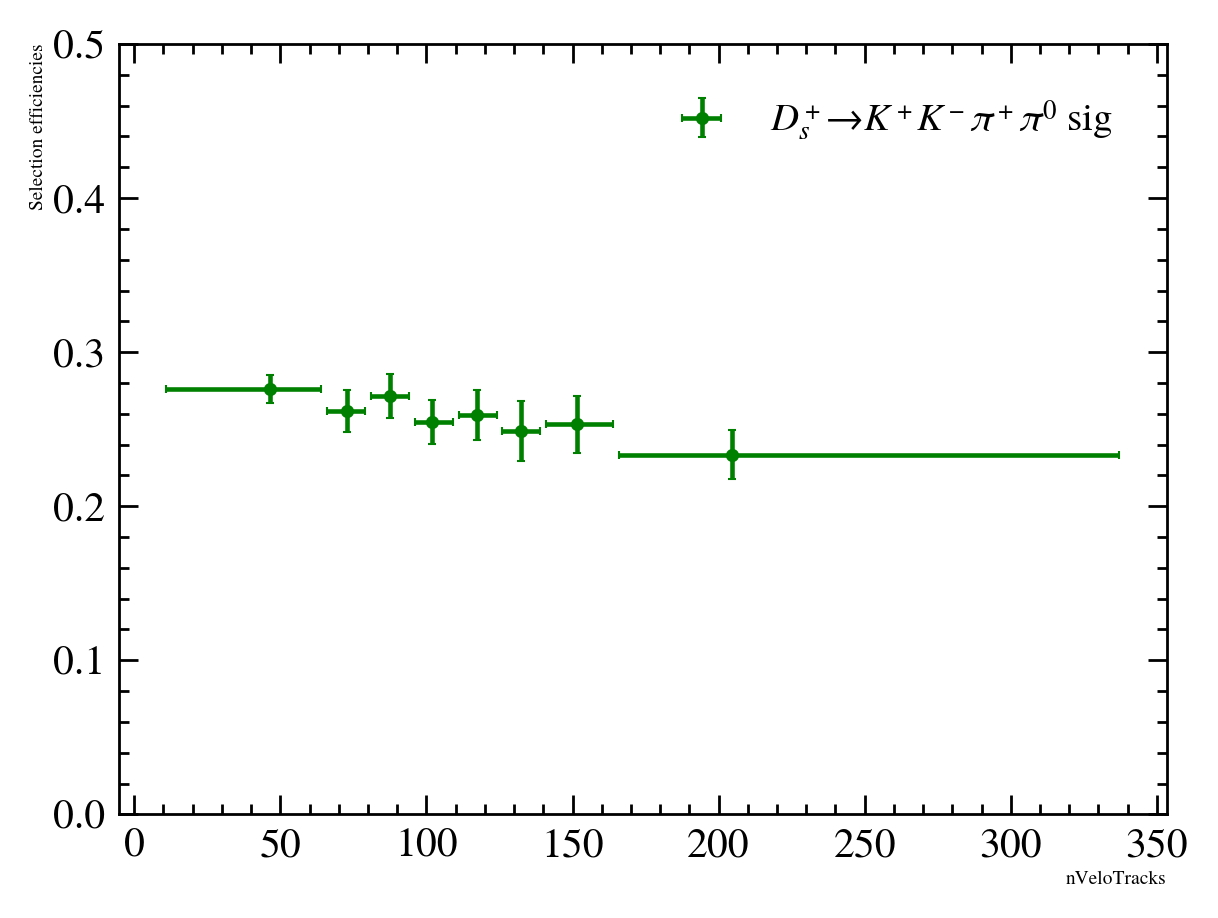

In [10]:
plt.figure()
plt.errorbar(nVT_mean, eff, ueff, xerr=[nVT_unc_low, nVT_unc_up], fmt='g.', ecolor='green', capsize=3, label=r"$D_{s}^+ \to K^+K^-\pi^+\pi^0$ sig")
plt.legend()
plt.xlabel(r"nVeloTracks")
plt.ylabel(r"Selection efficiencies")
plt.ylim(0,0.5)